In [1]:
import pandas as pd


In [7]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/comp_bikes_mod.csv')

In [8]:
# Número de instâncias
df.shape

(17379, 17)

In [9]:
# Detalhamento do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [12]:
# Proporção nulos coluna temp
df['temp'].isna().sum() / df.shape[0] * 100 

10.000575407100524

In [13]:
# Dropar coluna dteday
df.dropna(subset=['dteday'], inplace=True)
df.shape

(15641, 17)

In [14]:
# Média coluna temp
df['temp'].mean()

0.4969259206597582

In [15]:
# Desvio-padrão windspeed
df['windspeed'].std()

0.12230930508286268

In [16]:
# Categorizando season
df['season'].astype('category')

1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
        ... 
17373    1.0
17374    NaN
17375    1.0
17377    1.0
17378    NaN
Name: season, Length: 15641, dtype: category
Categories (4, float64): [1.0, 2.0, 3.0, 4.0]

In [18]:
# Conversão coluna dteday para data e data máxima
df['dteday'].astype('datetime64')
df['dteday'].max()

'2012-12-31'

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


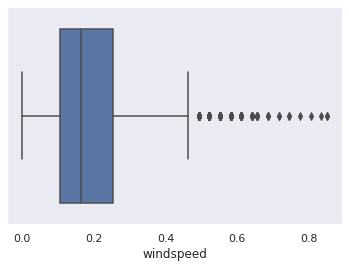

In [21]:
# Boxplot windspeed
sns.boxplot(df['windspeed'])
plt.show()

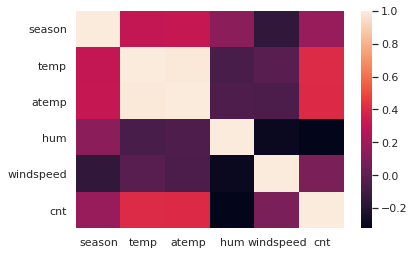

In [23]:
# Correlação entre season, temp, atemp, hum, windspeed e cnt
sns.heatmap(df[['season', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr())
plt.show()


In [31]:
# Regressão Linear
# Seleciona colunas
df_reg = df[['hum', 'cnt', 'casual']]

# Preenche dados nulos com médias
df_reg.fillna(df_reg.mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [33]:
# Regressão Linear
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

x = df_reg[['hum', 'casual']].values
y = df_reg['cnt'].values

linear.fit(x, y)
linear.score(x, y)

0.40598592511221737

In [34]:
# Árvore de Decisão
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

tree.fit(x, y)
tree.score(x, y)

0.7098339715834964